In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
dataset = 'GreenGenes'
metric = 'hamming'
max_depth = 50

In [3]:
raw_data = pd.read_csv(
    f'logs/info_{metric}_{max_depth}.csv',
    dtype={
        'cluster_name': str,
        'number_of_points': int,
        'center': int,
        'radius': np.float64,
        'lfd': np.float64,
        'is_leaf': bool,
    }
)
raw_data['cluster_name'][0] = ''
raw_data = raw_data.fillna(0.0)
raw_data['depth'] = list(map(len, raw_data.cluster_name.values))
raw_data.head()

/home/nishaq/Documents/research/CHESS/.chess/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
0,,123700,57568,0.764923,57568.000000,False,0
1,0,116852,325,0.711408,325.000000,False,1
2,00,116704,4825,0.713827,0.000828,False,2
3,000,116352,86372,0.711282,0.000831,False,3
4,0000,44941,117910,0.708969,0.001188,False,4


In [4]:
raw_data.shape

(47125, 7)

In [5]:
leaves = list(raw_data[raw_data.is_leaf == True].cluster_name.values)
print(len(leaves))

23563


In [6]:
tree_depth = max(raw_data.depth.values)
max_lfd = max(raw_data.lfd.values)
print(tree_depth, max_lfd)

50 57568.0


In [7]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,47125.000000,47125.000000,47125.000000,47125.000000,47125.000000
mean,91.646684,60763.163395,0.012352,2.792899,32.596032
std,1648.066290,36013.653121,0.050066,291.877354,8.151256
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,29440.000000,0.001582,0.310929,28.000000
50%,11.000000,58714.000000,0.003349,0.874469,34.000000
75%,23.000000,92433.000000,0.006942,1.584963,38.000000
max,123700.000000,123698.000000,0.764923,57568.000000,50.000000


In [8]:
raw_data[raw_data.lfd > 5].shape

(3, 7)

In [9]:
raw_data.lfd.clip(lower=0, upper=5, inplace=True)

In [10]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,47125.000000,47125.000000,47125.000000,47125.000000,47125.000000
mean,91.646684,60763.163395,0.012352,1.003000,32.596032
std,1648.066290,36013.653121,0.050066,0.828434,8.151256
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,29440.000000,0.001582,0.310929,28.000000
50%,11.000000,58714.000000,0.003349,0.874469,34.000000
75%,23.000000,92433.000000,0.006942,1.584963,38.000000
max,123700.000000,123698.000000,0.764923,5.000000,50.000000


In [11]:
fractal_dim_by_depth = [raw_data[raw_data.depth == i] for i in range(1 + max(raw_data.depth))]
fractal_dim_by_depth[3].head(20)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
3,000,116352,86372,0.711282,0.000831,False,3
44446,001,352,74603,0.351444,0.058552,False,3
44586,010,145,61161,0.625895,0.071385,False,3
44645,011,3,61250,0.249920,0.584963,True,3
44649,110,453,62189,0.724224,0.025706,False,3
44794,111,6388,7698,0.742977,0.017039,False,3


In [12]:
print(f'depth, number_of_clusters, r_median, r_mean, r_stddev')
for d, temp_df in enumerate(fractal_dim_by_depth):
    mean_radius = temp_df.radius.mean()
    median_radius = temp_df.radius.median()
    stddev_radius = temp_df.radius.std()
    if d % 1 == 0:
        print(f'{d}, {temp_df.shape[0]}, {median_radius:.5f}, '
              f'{mean_radius:.5f}, {stddev_radius:.5f}')

depth, number_of_clusters, r_median, r_mean, r_stddev
0, 1, 0.76492, 0.76492, nan
1, 2, 0.72595, 0.72595, 0.02056
2, 4, 0.69650, 0.68765, 0.05331
3, 6, 0.66859, 0.56762, 0.21306
4, 10, 0.49903, 0.48890, 0.21830
5, 18, 0.45748, 0.44767, 0.22165
6, 34, 0.25462, 0.33278, 0.23510
7, 54, 0.15656, 0.26734, 0.22574
8, 70, 0.09770, 0.21714, 0.22928
9, 90, 0.07037, 0.18312, 0.21182
10, 114, 0.06346, 0.15268, 0.19467
11, 144, 0.06237, 0.13748, 0.18121
12, 188, 0.04509, 0.11028, 0.15897
13, 230, 0.04377, 0.09720, 0.14490
14, 276, 0.03786, 0.08497, 0.12855
15, 328, 0.03429, 0.07220, 0.11187
16, 378, 0.02846, 0.06228, 0.10449
17, 418, 0.02456, 0.05477, 0.09619
18, 516, 0.01897, 0.04352, 0.08407
19, 616, 0.01626, 0.03863, 0.07761
20, 678, 0.01391, 0.03368, 0.07460
21, 760, 0.01236, 0.02761, 0.06384
22, 838, 0.01078, 0.02473, 0.05962
23, 942, 0.00967, 0.02073, 0.04933
24, 1026, 0.00892, 0.01805, 0.04461
25, 1132, 0.00817, 0.01523, 0.03530
26, 1248, 0.00729, 0.01257, 0.03149
27, 1392, 0.00679, 0.01092

In [13]:
labels = [i / 10 for i in range(11)]
quantiles = {i : [temp_df.lfd.quantile(l) for l in labels]
             for i, temp_df in enumerate(fractal_dim_by_depth)}

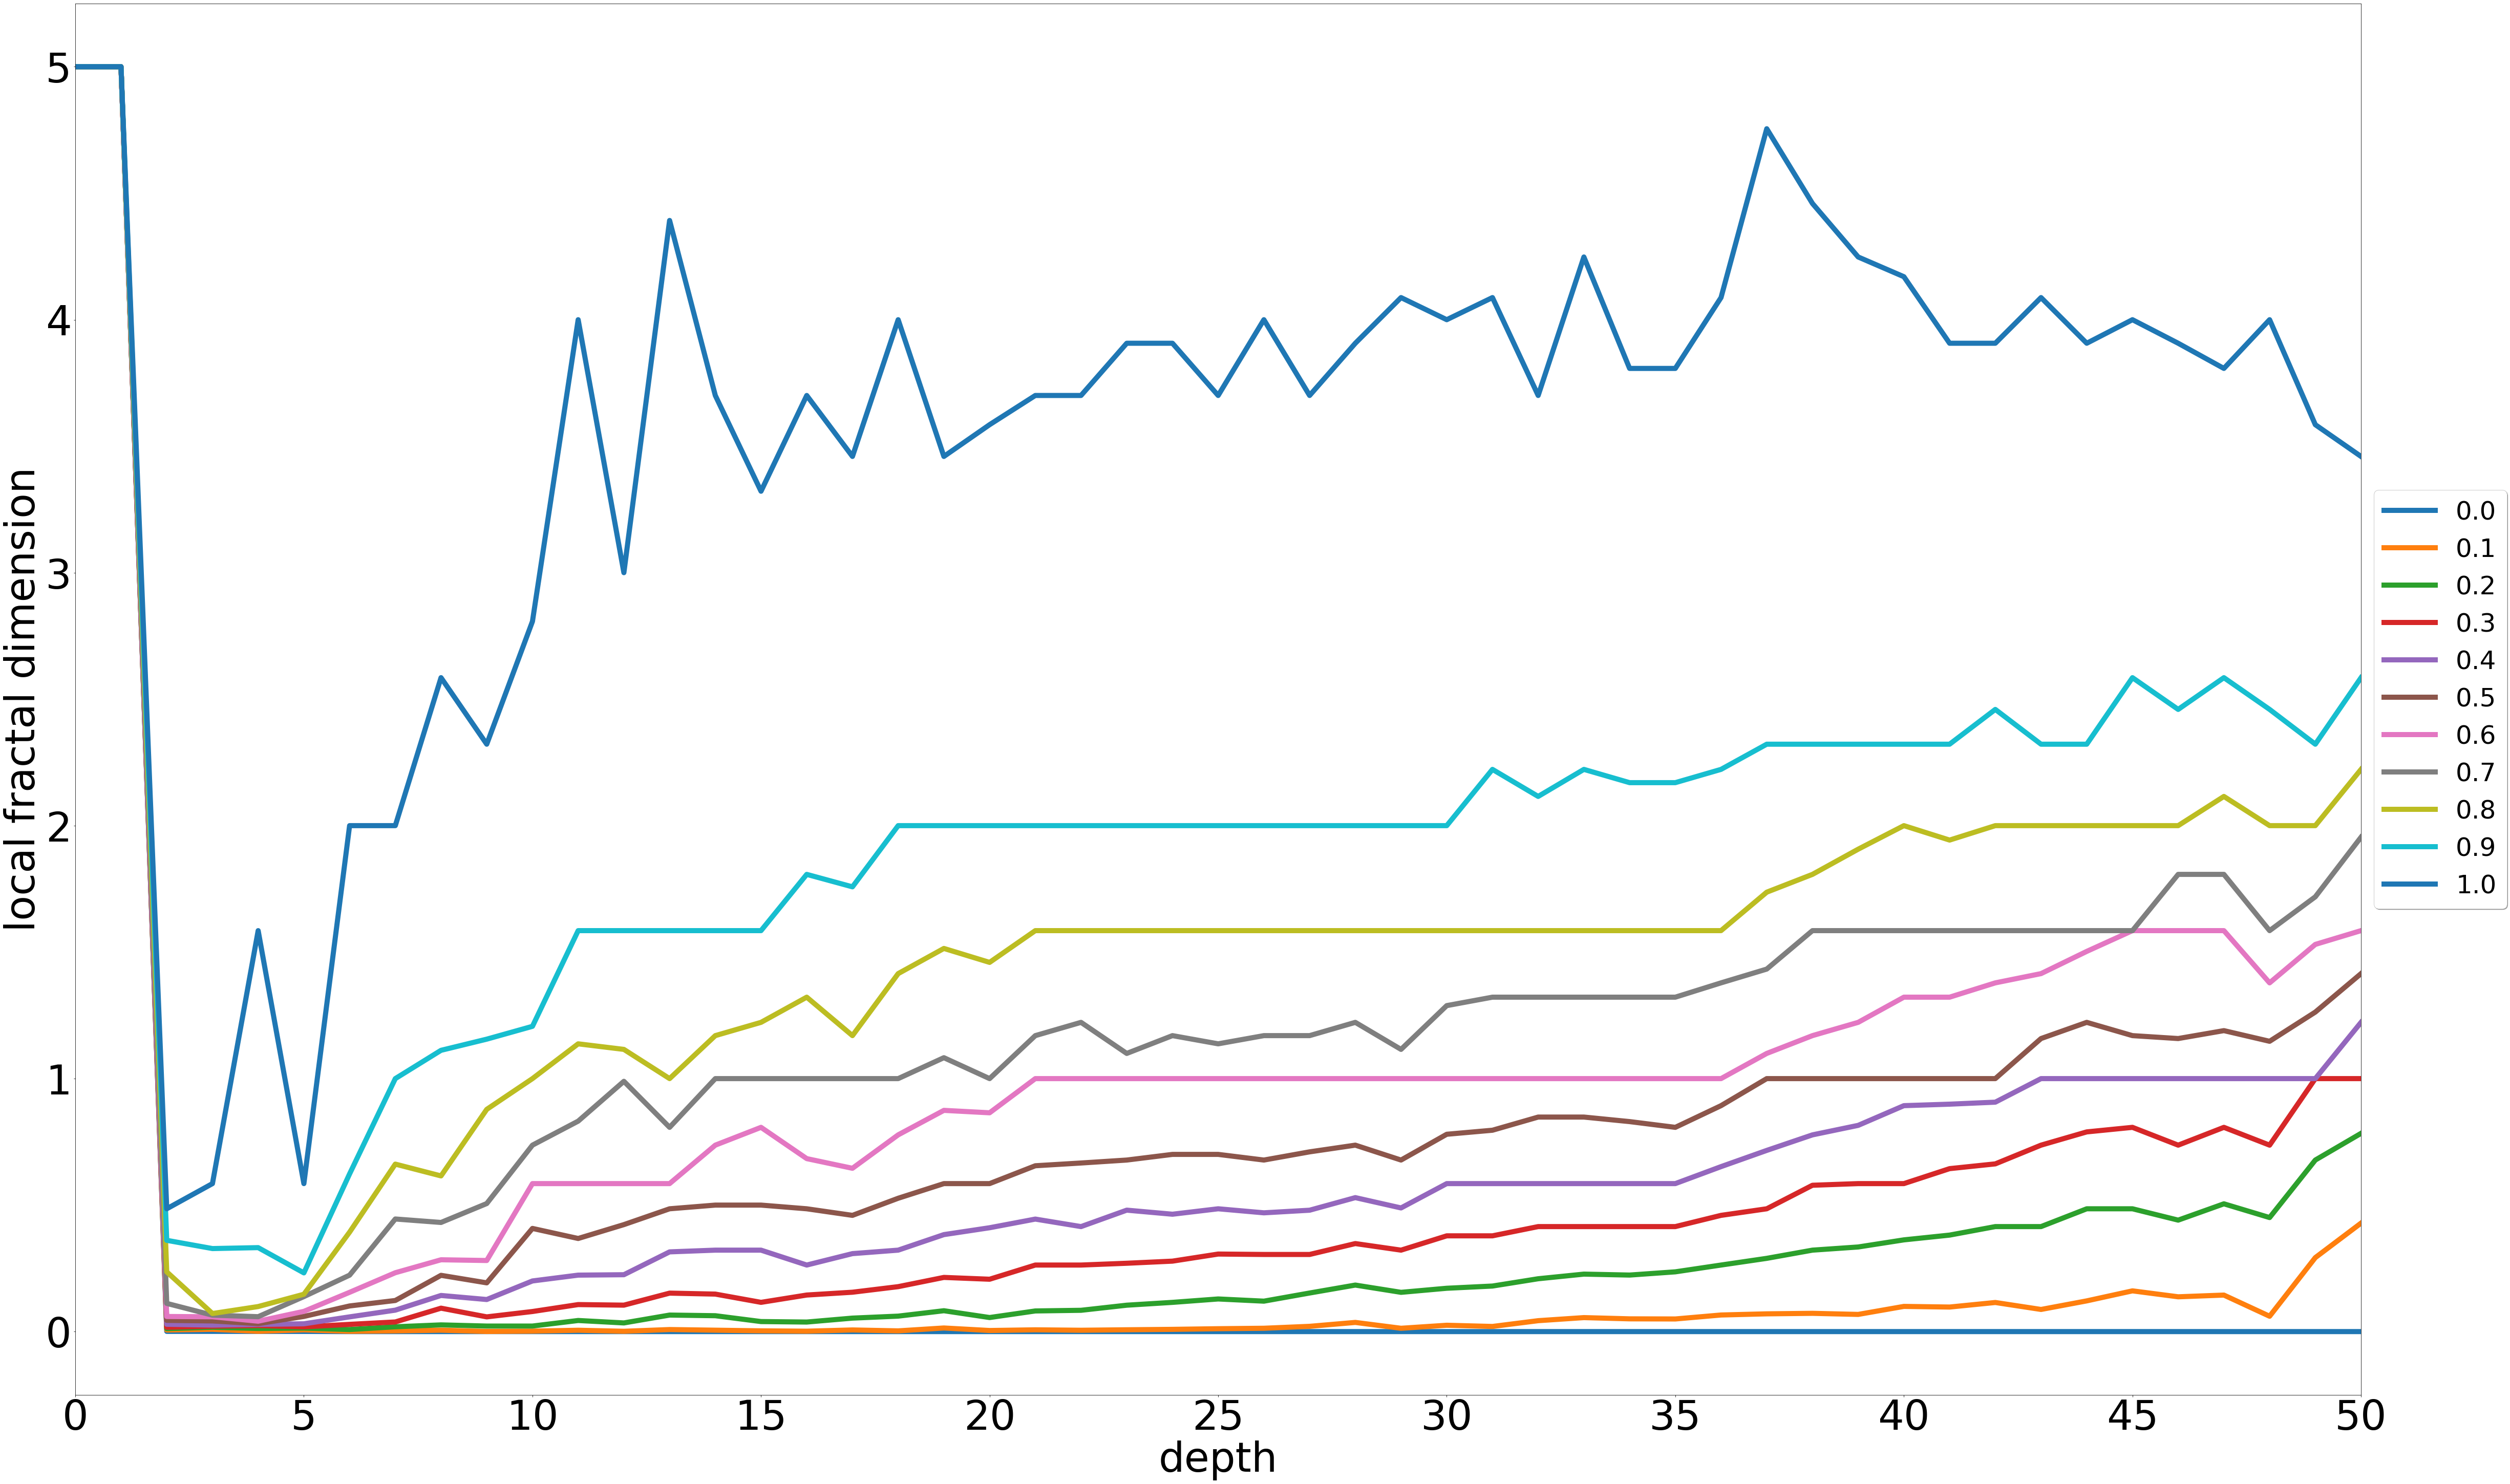

In [14]:
tags = list(map(str, labels))
quantiles_df = pd.DataFrame(quantiles)
quantiles_df['quantiles'] = labels
quantiles_df.set_index('quantiles', inplace=True)
quantiles_df_transpose = quantiles_df.T
fig, ax = plt.subplots()
my_plt = quantiles_df_transpose.plot(figsize=(100, 50), ax=ax, linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':50},
          fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xticks(list(range(0, max_depth + 1, 5)))
# ax.set_ylim([-0.5, 10.5])
# plt.yticks([i for i in range(0, 11, 2)])
plt.xlabel('depth', fontsize=80)
plt.ylabel('local fractal dimension', fontsize=80)
plt.show()
my_plt.get_figure().savefig(f'plots/lfd_vs_depth_{dataset}_{metric}.png')

In [15]:
num_queries = 50

In [22]:
raw_data = pd.read_csv(
    f'logs/vs_FALCONN/search_benchmarks_{dataset}_{metric}.csv',
    dtype={
        'depth': int,
        'radius': np.float64,
        'correctness': bool,
        'false_negative_rate': np.float64,
        'num_hits': int,
        'num_clusters_searched': int,
        'fraction_searched': np.float64,
        'df_calls_made': int,
        'linear_time': np.float64,
        'chess_time': np.float64,
        'speedup_factor': np.float64,
    }
)
# raw_data = raw_data[:140]
raw_data.head()

,depth,radius,correctness,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
0,50,2000.0,True,0.0,0,265,0.013549,1676,6.984870,0.900656,7.755
1,50,2000.0,True,0.0,0,144,0.007292,902,5.939032,0.662604,8.963
2,50,2000.0,True,0.0,0,337,0.017211,2129,5.841667,1.027868,5.683
3,50,2000.0,True,0.0,1,282,0.013888,1718,5.912297,1.022334,5.783
4,50,2000.0,True,0.0,478,1380,0.124899,15450,5.832503,2.368328,2.463


In [25]:
raw_data[raw_data.radius == 2000.0].chess_time.describe()

count    50.000000
mean      1.286152
std       0.765662
min       0.076765
25%       0.698903
50%       1.161421
75%       1.871522
max       2.634953
Name: chess_time, dtype: float64

In [71]:
total_linear_time = raw_data.linear_time.sum() / (raw_data.shape[0] / num_queries)
total_chess_time = raw_data.chess_time.sum()
total_time = total_chess_time + total_linear_time
print(f'total time: {total_time:.4f}')

total time: 8042.8506


In [123]:
radii_dict = {
    'euclidean': [2000.0, 4000.0],
    'cosine': [0.0005, 0.001],
    'hamming': [0.001, 0.01],
}
radii = radii_dict[metric]

In [125]:
data_by_search_radius = {}
for r in radii:
    temp_df = raw_data[raw_data.radius == r]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_radius[r] = temp_df
data_by_search_radius.keys()

dict_keys([0.0005, 0.001])

In [126]:
depths = list(range(0, max_depth + 1, 5))
depths

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [75]:
data_by_search_depth = {}
for d in depths:
    temp_df = raw_data[raw_data.depth == d]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_depth[d] = temp_df
data_by_search_depth.keys()

dict_keys([0, 5, 10, 15, 20, 25, 30])

In [76]:
x = depths
y1 = []  # comparisons
y2 = []  # speedup
y3 = []  # time
y4 = []  # fraction
ys = []

In [77]:
print(f'depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu')
for r in radii:
    mos = data_by_search_radius[r].num_hits.mean()
    sos = data_by_search_radius[r].num_hits.std()
    print(f'\nradius: {r}, mean_output_size: {mos:.0f}, std_output_size: {sos:.0f}')
    for depth, df_by_depth in data_by_search_depth.items():
        data_df = df_by_depth[df_by_depth.radius == r]
        
        mean_df_calls = data_df.df_calls_made.mean() / 10_000
        stddev_df_calls = data_df.df_calls_made.std() / 10_000
        y1.append(mean_df_calls)
        
        mean_speedup = data_df.speedup_factor.mean()
        y2.append(mean_speedup)
        
        mean_time = data_df.chess_time.mean()
        stddev_time = data_df.chess_time.std()
        y3.append(mean_time)
        
        mean_fraction = data_df.fraction_searched.mean()
        stddev_fraction = data_df.fraction_searched.std()
        y4.append(mean_fraction)
        
        if not depth in depths:
            continue
        print(f'{depth} & {mean_df_calls:.2f} & {stddev_df_calls:.2f} & {mean_time:.2f} & '
              f'{stddev_time:.2f} & {mean_fraction:.2f} & {stddev_fraction:.2f} & '
              f'{mean_speedup:.2f}\\\\')
    ys.append((y1.copy(), y2.copy(), y3.copy(), y4.copy()))
    y1, y2, y3, y4 = [], [], [], []

depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu

radius: 0.01, mean_output_size: 4919, std_output_size: 12164
0 & 101.74 & 0.00 & 56.94 & 0.17 & 1.00 & 0.00 & 1.00\\
5 & 100.31 & 0.00 & 56.26 & 0.24 & 0.99 & 0.00 & 1.02\\
10 & 91.04 & 4.39 & 51.22 & 2.52 & 0.89 & 0.04 & 1.12\\
15 & 52.66 & 9.83 & 30.68 & 5.61 & 0.52 & 0.10 & 1.94\\
20 & 18.08 & 6.16 & 13.52 & 3.80 & 0.18 & 0.06 & 4.61\\
25 & 5.85 & 3.16 & 8.34 & 2.49 & 0.06 & 0.03 & 7.56\\
30 & 3.72 & 2.69 & 7.54 & 2.19 & 0.04 & 0.03 & 8.25\\

radius: 0.02, mean_output_size: 20396, std_output_size: 26481
0 & 101.74 & 0.00 & 57.48 & 0.42 & 1.00 & 0.00 & 1.00\\
5 & 100.52 & 0.18 & 56.72 & 0.34 & 0.99 & 0.00 & 1.01\\
10 & 97.26 & 2.45 & 55.16 & 1.47 & 0.96 & 0.02 & 1.04\\
15 & 72.00 & 5.63 & 42.53 & 3.31 & 0.71 & 0.06 & 1.35\\
20 & 42.37 & 10.63 & 30.13 & 6.46 & 0.42 & 0.10 & 1.99\\
25 & 29.22 & 10.93 & 26.17 & 6.89 & 0.29 & 0.11 & 2.34\\
30 & 27.03 & 11.02 & 25.54 & 7.15 & 0.27 & 0.11 & 2.42\\



In [78]:
np.shape(ys[0][0])

(7,)

<Figure size 432x288 with 0 Axes>

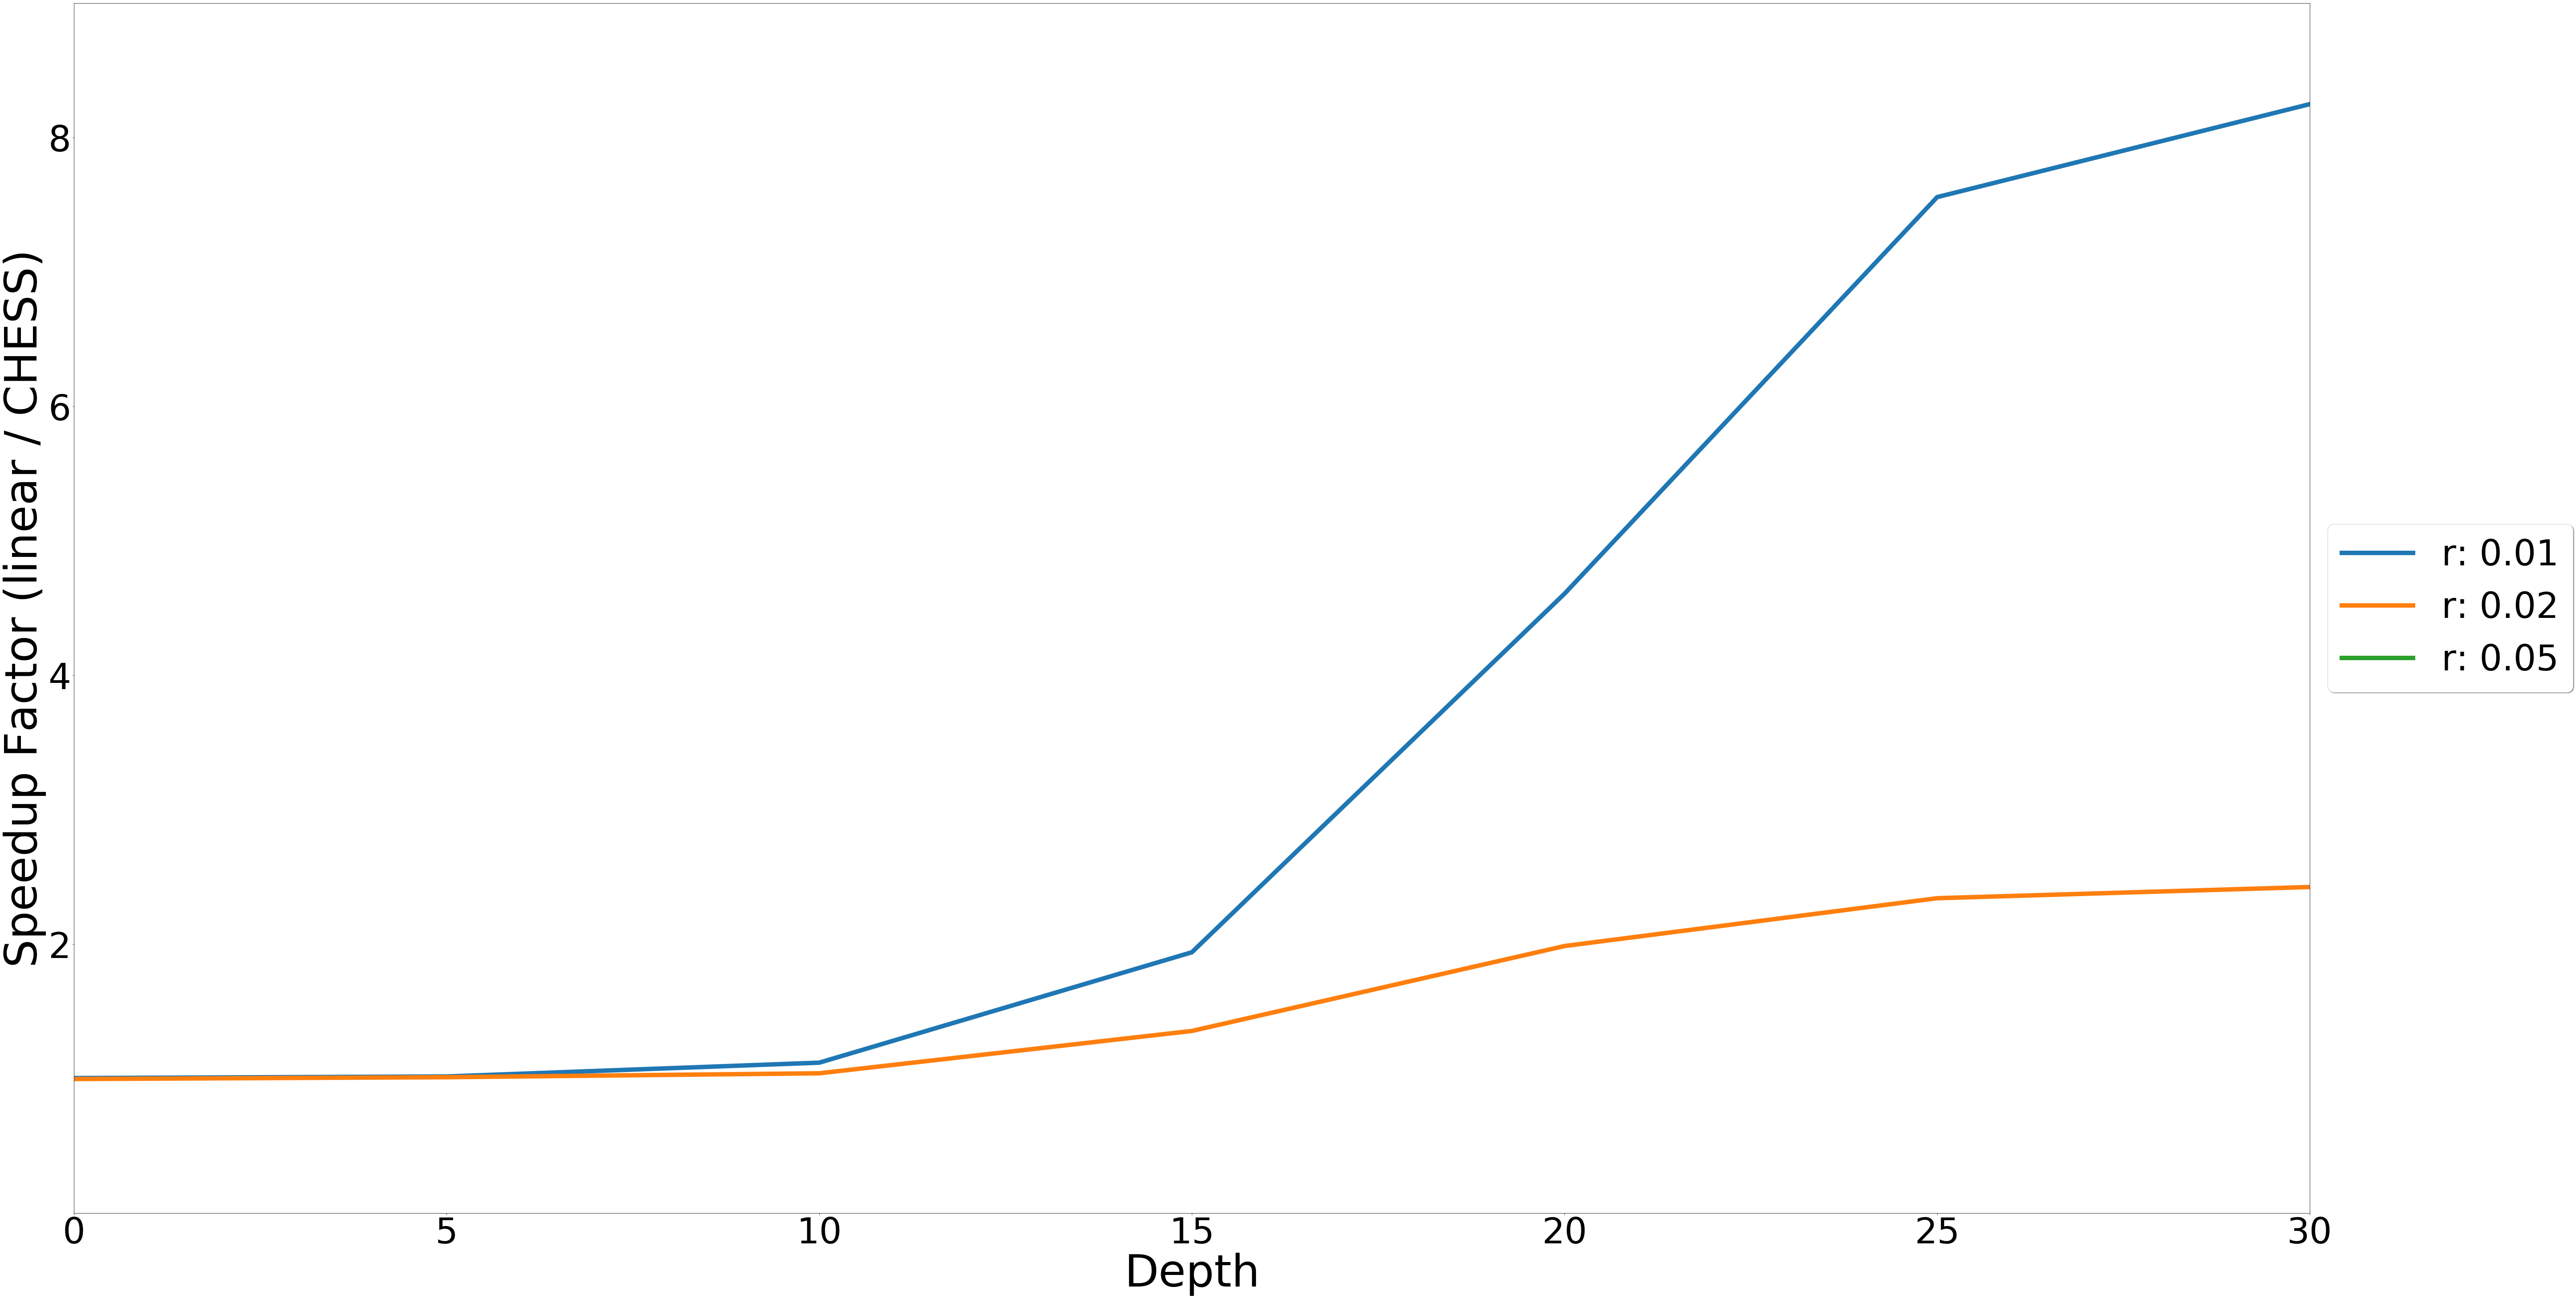

In [79]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][1], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 9])
plt.yticks([i for i in range(2, 9, 2)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Speedup Factor (linear / CHESS)', fontsize=100)
plt.show()
fig.savefig(f'plots/speedup_factor_{dataset}_{metric}.png')

<Figure size 432x288 with 0 Axes>

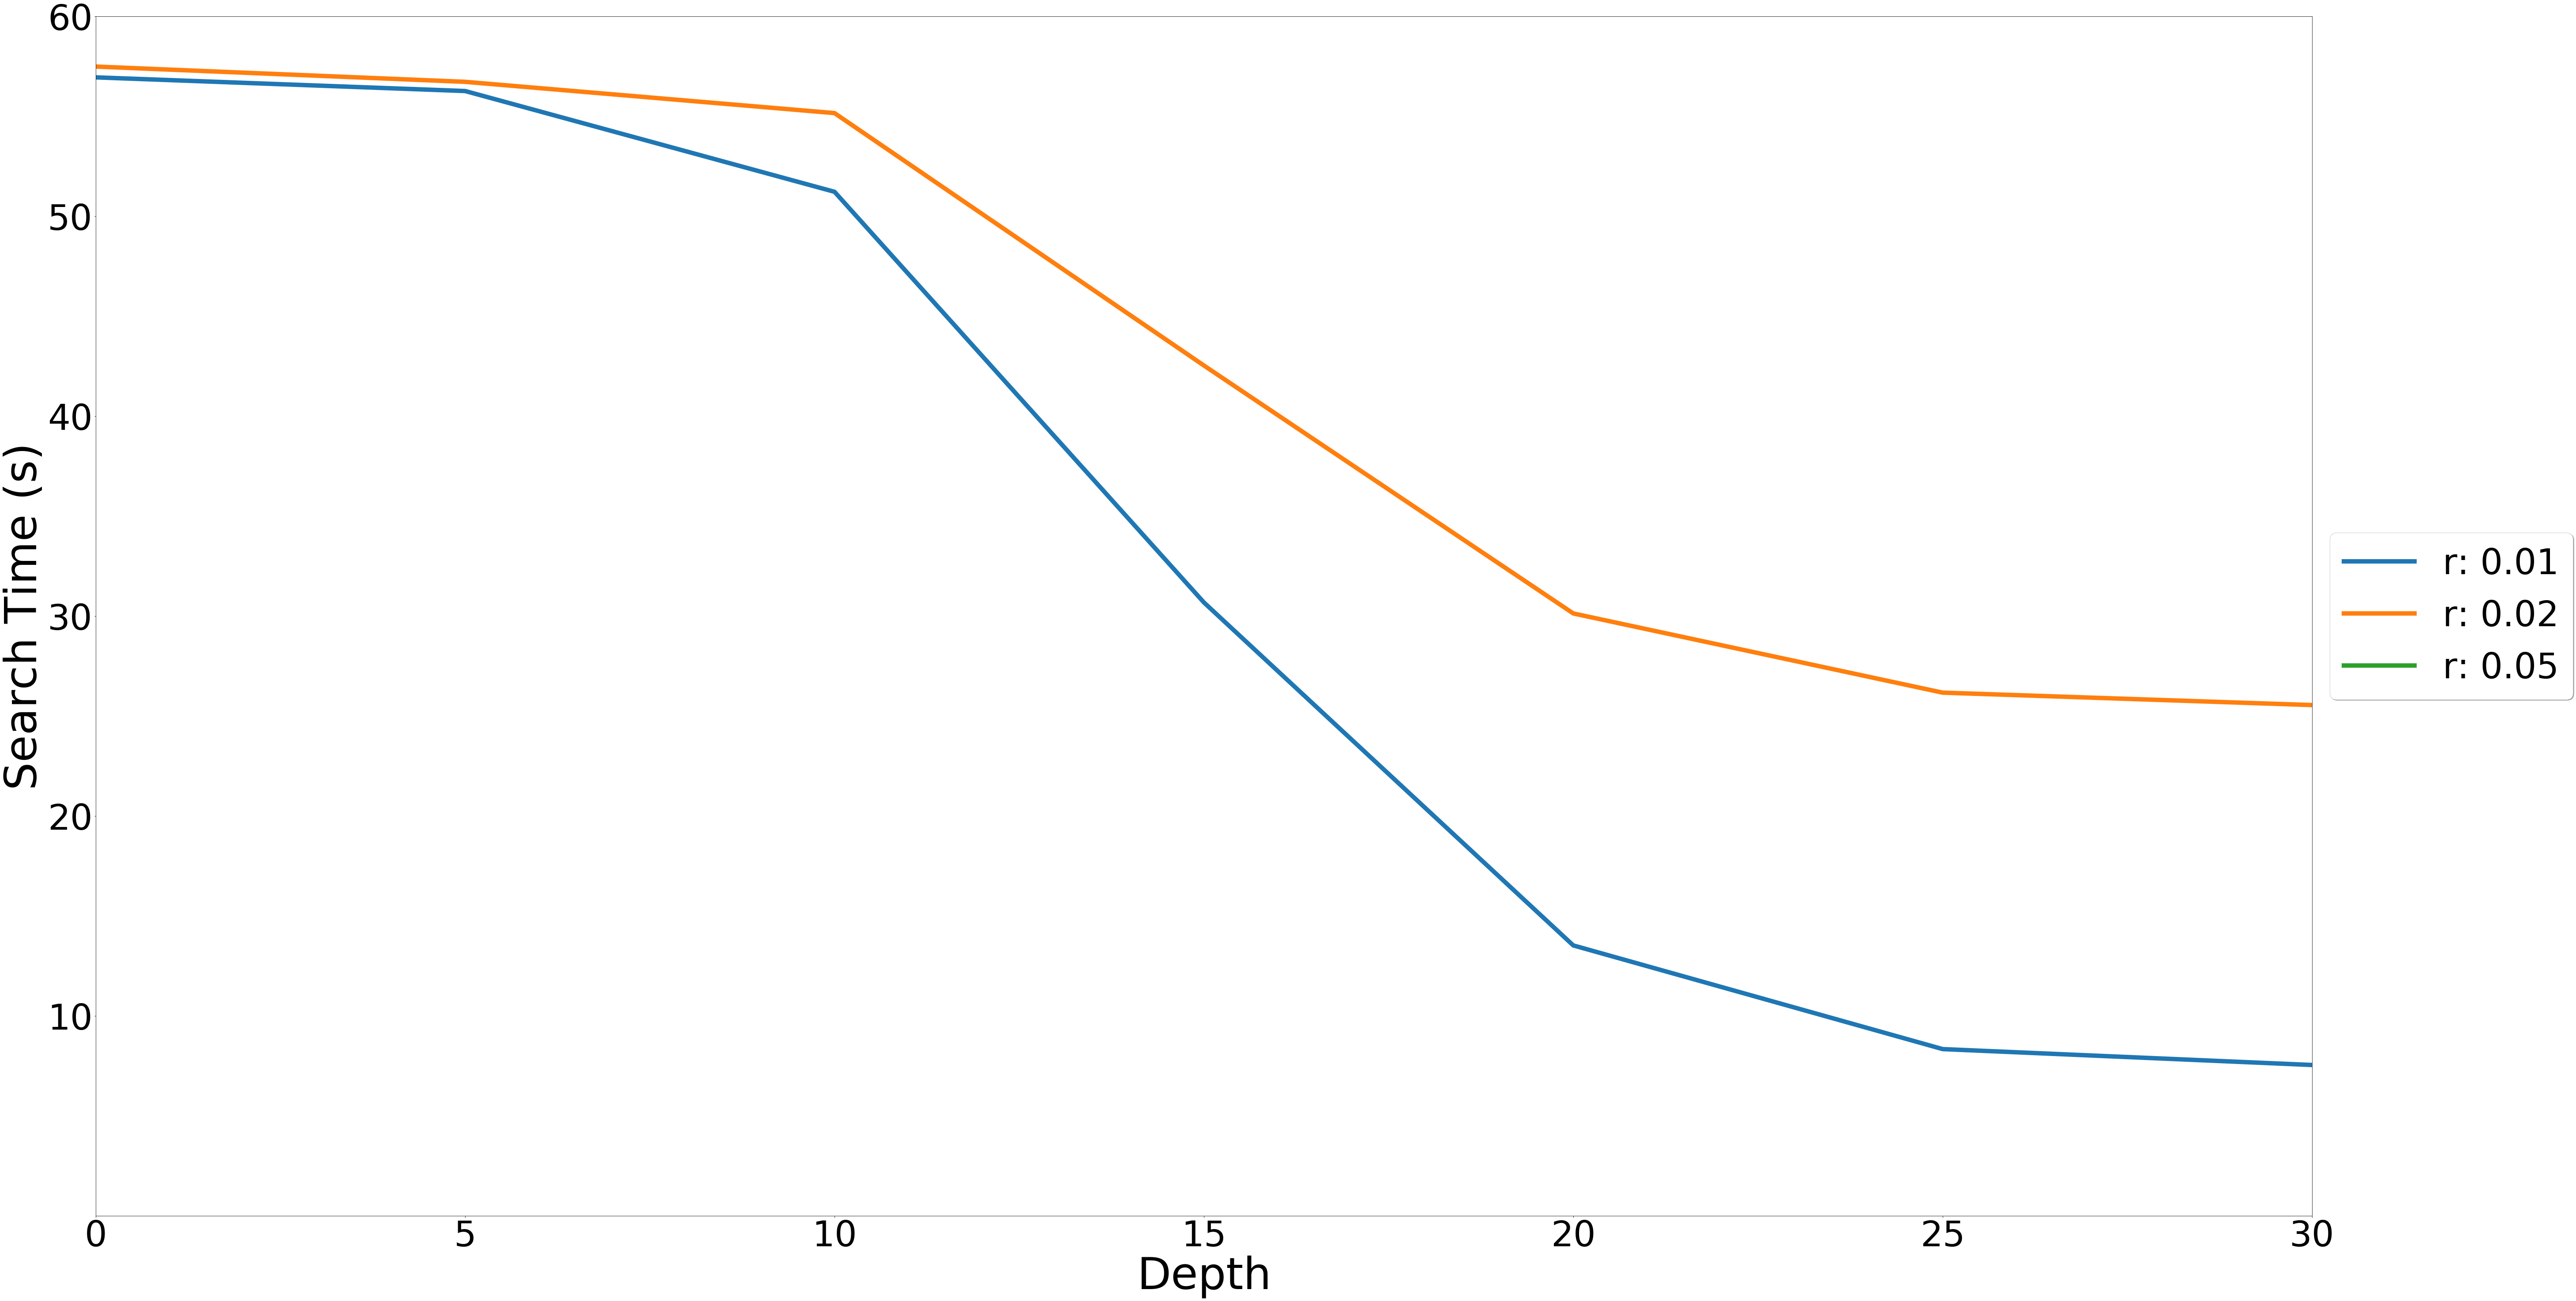

In [80]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][2], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 60])
plt.yticks([i for i in range(10, 61, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Search Time (s)', fontsize=100)
plt.show()
fig.savefig(f'plots/search_time_{dataset}_{metric}.png')